In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

coins = pd.read_csv('coins.csv')

In [6]:
def plot_bollinger_bands(coins, symbol, window, width):
    data = pd.DataFrame(coins, columns=['date', 'close'])

    data['MA'] = data['close'].rolling(window=window).mean()
    data['STD'] = data['close'].rolling(window=window).std()
    data['STD'] = data['STD'].mul(width)
    data['upper'] = data['MA'] + data['STD']
    data['lower'] = data['MA'] - data['STD']
    data = data.dropna()

    plt.figure(figsize=(12,6))

    t = data['date']
    plt.plot(t, data['close'], label='close')
    plt.plot(t, data['lower'], label='lower')
    plt.plot(t, data['upper'], label='upper')
    plt.plot(t, data['MA'], label='moving average')

    plt.xlabel('date')
    plt.ylabel('price')
    plt.legend(loc='best')
    
    plt.show()


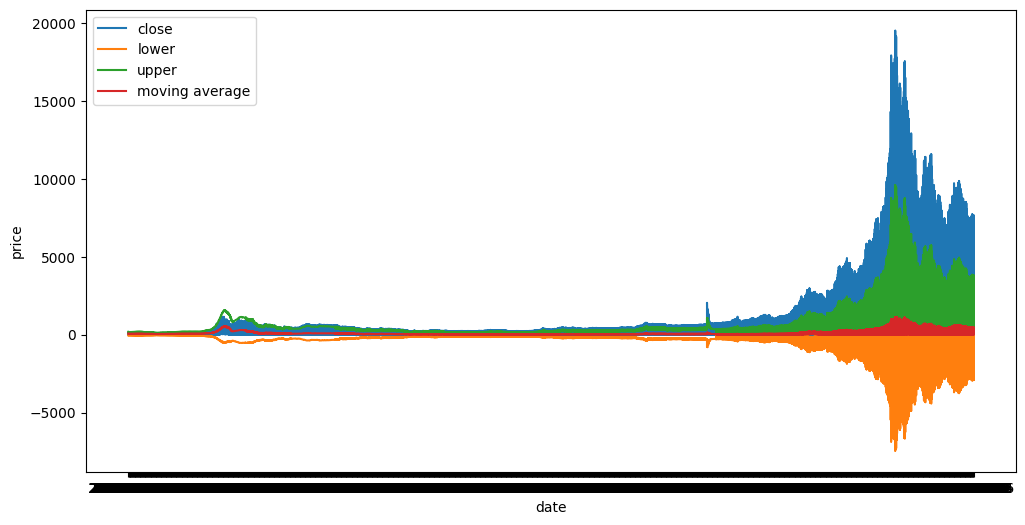

In [7]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)

График показывает, что close оказалось выше чем максимальная предпологаемая цена.